In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_table('Shuttle_Expression_v3.tsv', sep='\t')
df.head()

,sample,samples,_primary_site,SLC25A11,SLC25A12,SLC25A13,SLC16A1,SLC16A4,SLC16A7,MPC1,MPC2,GPD1,GPD1L,GPD2,LDHA,LDHB,LDHC,LDHD
0,K-562-SM-3P61Y,K-562-SM-3P61Y,Bone Marrow,10.47,10.030,11.48,13.25,5.400,0.000,10.65,11.89,4.434,9.900,10.78,16.84,14.73,0.8674,5.748
1,K-562-SM-4WWAK,K-562-SM-4WWAK,Bone Marrow,10.44,9.788,11.43,13.14,5.119,0.000,10.85,12.13,4.473,9.806,10.64,16.80,14.72,0.9740,5.593
2,K-562-SM-4IHK7,K-562-SM-4IHK7,Bone Marrow,10.34,9.864,11.23,13.03,5.064,1.110,10.42,11.78,3.781,9.489,10.53,16.42,14.37,1.7300,5.763
3,K-562-SM-4VBPT,K-562-SM-4VBPT,Bone Marrow,10.30,9.966,11.54,13.34,5.413,1.379,10.86,12.12,4.644,9.927,10.91,16.87,14.77,0.8481,5.300
4,K-562-SM-5J2LX,K-562-SM-5J2LX,Bone Marrow,10.30,9.965,11.49,13.23,5.011,1.794,10.69,12.00,4.255,9.943,10.74,16.76,14.69,0.8658,5.831


In [4]:
# Clean up data 
# Drop all data with body_site_detail (SMTSD) contaning cells 
df = df[~df['_primary_site'].str.contains('cells')]
# Drop not provided
df = df[~df['_primary_site'].str.contains('not provided')]



In [5]:
# # Transform numeric data to normalized counts 
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# df[numeric_cols] = df[numeric_cols].apply(lambda x: 2**(x)-1)

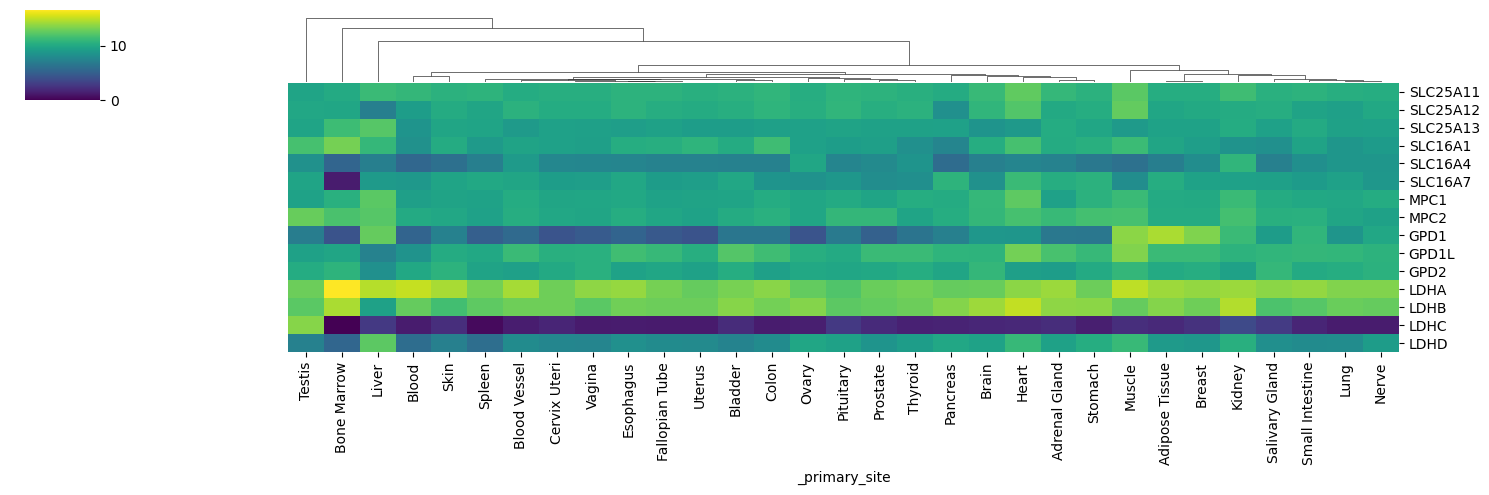

In [6]:
# Get the y-axis order by clustering on the median expression of each gene pert body site

# Get the mean expression of each gene per body site
mean_expression = df.groupby('_primary_site').median()
mean_expression.head()

# Cluster the body sites based on the median expression of each gene
sns.clustermap(mean_expression.T, cmap='viridis', figsize=(15, 5), metric='cosine',row_cluster=False)

# Get the x-axis order
x_axis_order = mean_expression.T.columns


In [7]:

# Transform numeric data to counts counts
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: 2**(x)-1)

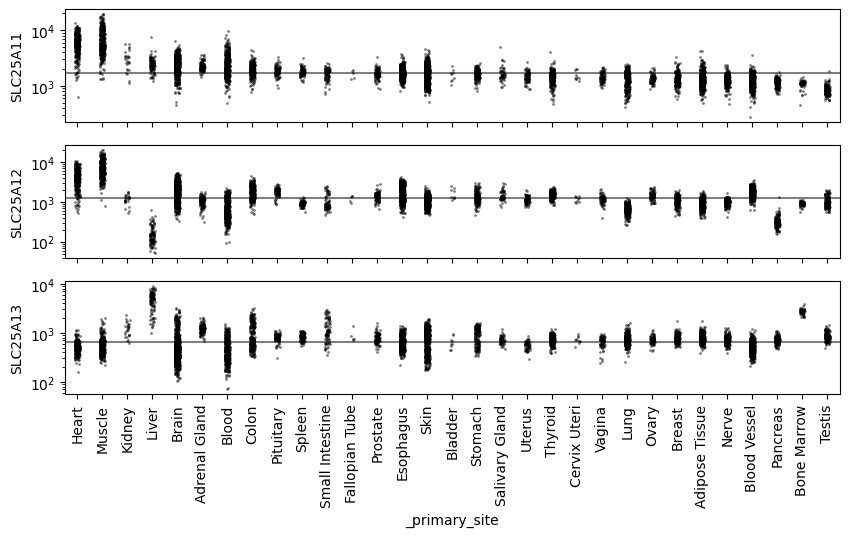

In [13]:
f, ax = plt.subplots(3,1,figsize=(10, 5), sharex=True , sharey=False)

# Violin plot
# Add a horizontal line at the median expression of each gene
genes = ['SLC25A11', 'SLC25A12', 'SLC25A13',]

# Rank the genes by expression of SLC25A11
x_axis_order = df.groupby('_primary_site')['SLC25A11'].median().sort_values(ascending=False).index

for i in range(3):
    ax[i].axhline(df[genes[i]].median(), color='k', linestyle='-', alpha=0.5 )
    ax[i].set_yscale('log')

sns.stripplot(x='_primary_site', y='SLC25A11', data=df , ax=ax[0], 
               order=x_axis_order, color='black', alpha=0.5, size=2)
sns.stripplot(x='_primary_site', y='SLC25A12', data=df , ax=ax[1], 
               order=x_axis_order, color='black', alpha=0.5, size=2)
sns.stripplot(x='_primary_site', y='SLC25A13', data=df , ax=ax[2], 
               order=x_axis_order, color='black', alpha=0.5, size=2)

plt.xticks(rotation=90)

plt.show()


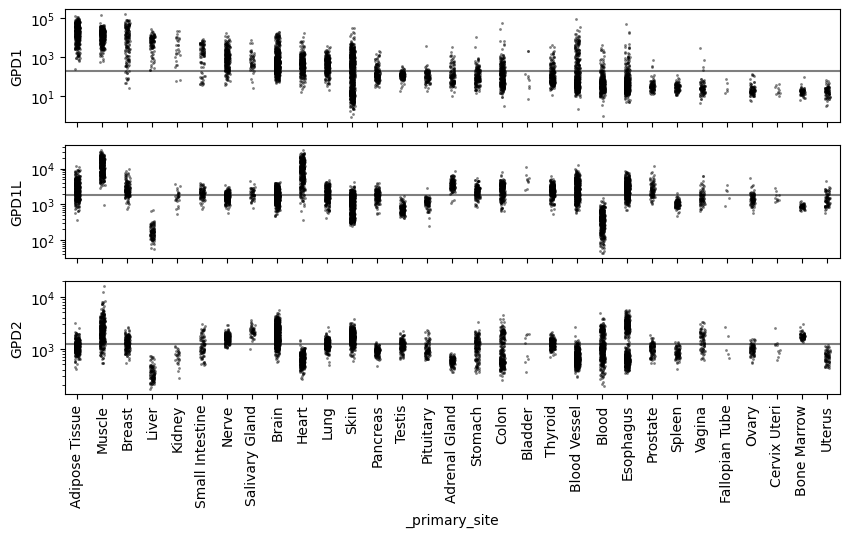

In [14]:

# Make a list of strip plots
# Add a horizontal line at the median expression of each gene
genes = ['GPD1', 'GPD1L', 'GPD2',]

f, ax = plt.subplots(len(genes),1,figsize=(10, 5), sharex=True , sharey=False)

# Rank the genes by expression of SLC25A11
x_axis_order = df.groupby('_primary_site')['GPD1'].median().sort_values(ascending=False).index

for i in range(3):
    ax[i].axhline(df[genes[i]].median(), color='k', linestyle='-', alpha=0.5 )
    ax[i].set_yscale('log')

for i, gene in enumerate(genes):
    sns.stripplot(x='_primary_site', y=gene, data=df , ax=ax[i], 
               order=x_axis_order, color='black', alpha=0.5, size=2)


plt.xticks(rotation=90)

plt.show()

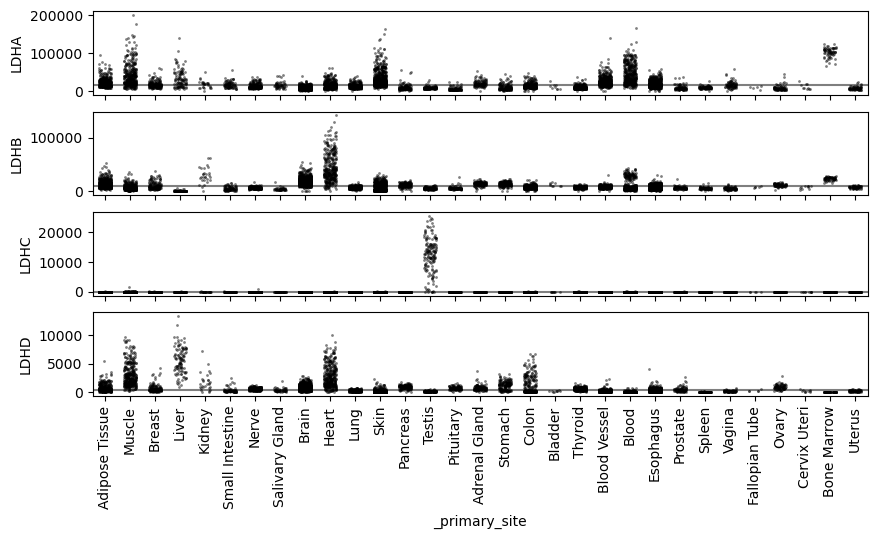

In [10]:

# Make a list of strip plots
# Add a horizontal line at the median expression of each gene
genes = ['LDHA', 'LDHB', 'LDHC','LDHD',]

f, ax = plt.subplots(len(genes),1,figsize=(10, 5), sharex=True )

# Rank the genes by expression of SLC25A11
x_axis_order = df.groupby('_primary_site')['GPD1'].median().sort_values(ascending=False).index

for i in range(len(genes)):
    ax[i].axhline(df[genes[i]].median(), color='k', linestyle='-', alpha=0.5 )

for i, gene in enumerate(genes):
    sns.stripplot(x='_primary_site', y=gene, data=df , ax=ax[i], 
               order=x_axis_order, color='black', alpha=0.5, size=2, jitter=0.25)


plt.xticks(rotation=90)

plt.show()

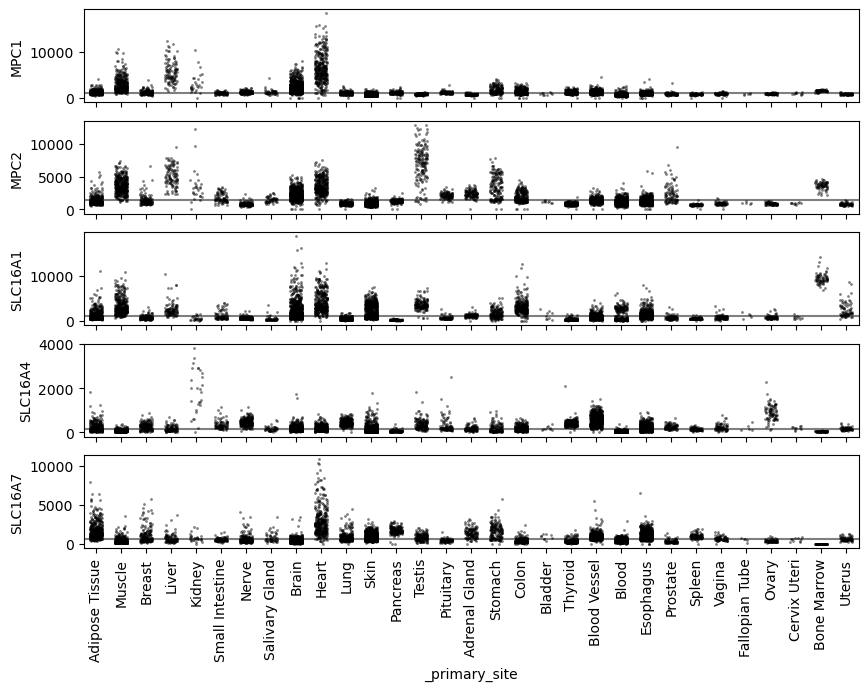

In [11]:

# Make a list of strip plots
# Add a horizontal line at the median expression of each gene
genes = ['MPC1', 'MPC2', 'SLC16A1','SLC16A4','SLC16A7']

f, ax = plt.subplots(len(genes),1,figsize=(10, 7), sharex=True )

# Rank the genes by expression of SLC25A11
x_axis_order = df.groupby('_primary_site')['GPD1'].median().sort_values(ascending=False).index

for i in range(len(genes)):
    ax[i].axhline(df[genes[i]].median(), color='k', linestyle='-', alpha=0.5 )

for i, gene in enumerate(genes):
    sns.stripplot(x='_primary_site', y=gene, data=df , ax=ax[i], 
               order=x_axis_order, color='black', alpha=0.5, size=2, jitter=0.25)


plt.xticks(rotation=90)

plt.show()